In [2]:
from keras.layers import Dense, LeakyReLU, Dropout, Input
from keras import regularizers, metrics
from keras.models import Model, Sequential
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics

/Users/schen/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
############Data configuration

In [4]:
allSamples = pd.read_csv("/Users/schen/Desktop/scExpression/projects/SAE/data/allgene_celltype_fraction.csv", index_col=0)

In [5]:
allSamples.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
DDX11L1,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,...,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
WASH7P_p1,0.115385,0.070175,0.030303,0.074074,0.029412,0.108108,0.086957,0.0,0.0,0,...,0,0.111111,0.0,0.0,0.285714,0.0,0.0,0.0,0.000000,0.0
LINC01002_loc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,...,0,0.000000,0.0,0.0,0.285714,0.0,0.0,0.0,0.000000,0.0
LOC100133331_loc1,0.153846,0.017544,0.000000,0.037037,0.058824,0.081081,0.130435,0.0,0.0,0,...,0,0.111111,0.0,0.0,0.571429,0.0,0.0,0.0,0.333333,0.0
LOC100132287_loc2,0.038462,0.000000,0.030303,0.000000,0.029412,0.027027,0.000000,0.0,0.0,0,...,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [6]:
allSamples.shape

(19531, 113)

In [7]:
validation = allSamples.sample(n = 2000, replace = False)

In [8]:
unsuperTrain = allSamples.loc[~allSamples.index.isin(validation.index),]

In [9]:
unsuperTrain.shape

(17531, 113)

In [10]:
autism = pd.read_csv("/Users/schen/Desktop/scExpression/projects/SAE/data/sfari_genescore1_2_celltype_fraction.csv", index_col = 0)

In [11]:
autism.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
ADNP,0.384615,0.438596,0.151515,0.444444,0.676471,0.432432,0.369565,0.416667,0.000000,1,...,0,0.333333,0.333333,0.166667,0.428571,0.5,0.25,0.666667,0.333333,0.25
ARID1B,0.576923,0.350877,0.212121,0.259259,0.441176,0.351351,0.434783,0.416667,0.333333,1,...,0,0.111111,0.666667,0.000000,0.428571,0.0,0.25,0.333333,1.000000,0.00
DYRK1A,0.307692,0.280702,0.151515,0.296296,0.500000,0.351351,0.304348,0.333333,0.666667,1,...,0,0.222222,0.000000,0.000000,0.142857,0.5,0.50,0.666667,0.333333,0.00
CHD2,0.576923,0.456140,0.484848,0.518519,0.500000,0.540541,0.456522,0.416667,0.000000,1,...,1,0.666667,0.666667,0.666667,0.571429,0.5,0.75,1.000000,0.333333,0.00
ASH1L,0.615385,0.438596,0.181818,0.370370,0.294118,0.540541,0.478261,0.250000,0.333333,1,...,1,0.777778,0.666667,0.666667,0.428571,0.0,0.75,1.000000,0.333333,0.00


In [12]:
autism.shape

(78, 113)

In [13]:
control = pd.read_csv("/Users/schen/Desktop/scExpression/projects/SAE/data/1911_control_celltype_fraction.csv", index_col=0)

In [14]:
control.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
CPEB2,0.153846,0.017544,0.000000,0.074074,0.029412,0.027027,0.021739,0.25,0.333333,0,...,0,0.222222,0.000000,0.166667,0.000000,0.0,0.25,0.000000,0.333333,0.25
ERI2,0.115385,0.157895,0.060606,0.037037,0.147059,0.108108,0.217391,0.00,0.000000,0,...,0,0.000000,0.000000,0.000000,0.142857,0.0,0.00,0.000000,0.000000,0.00
IZUMO1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00
MICAL2,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.25
MYH10,0.769231,0.614035,0.454545,0.629630,0.735294,0.783784,0.717391,0.75,0.666667,1,...,0,0.555556,0.666667,0.666667,0.142857,1.0,0.50,0.666667,0.000000,0.75


In [15]:
control.shape

(121, 113)

In [16]:
autism.index.intersection(control.index) #should be 0 object

Index([], dtype='object')

In [152]:
combine = [autism, control]

In [153]:
combine = pd.concat(combine)
combine

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
ADNP,0.384615,0.438596,0.151515,0.444444,0.676471,0.432432,0.369565,0.416667,0.000000,1,...,0,0.333333,0.333333,0.166667,0.428571,0.5,0.25,0.666667,0.333333,0.25
ARID1B,0.576923,0.350877,0.212121,0.259259,0.441176,0.351351,0.434783,0.416667,0.333333,1,...,0,0.111111,0.666667,0.000000,0.428571,0.0,0.25,0.333333,1.000000,0.00
DYRK1A,0.307692,0.280702,0.151515,0.296296,0.500000,0.351351,0.304348,0.333333,0.666667,1,...,0,0.222222,0.000000,0.000000,0.142857,0.5,0.50,0.666667,0.333333,0.00
CHD2,0.576923,0.456140,0.484848,0.518519,0.500000,0.540541,0.456522,0.416667,0.000000,1,...,1,0.666667,0.666667,0.666667,0.571429,0.5,0.75,1.000000,0.333333,0.00
ASH1L,0.615385,0.438596,0.181818,0.370370,0.294118,0.540541,0.478261,0.250000,0.333333,1,...,1,0.777778,0.666667,0.666667,0.428571,0.0,0.75,1.000000,0.333333,0.00
ASXL3,0.230769,0.052632,0.030303,0.000000,0.058824,0.108108,0.108696,0.333333,0.000000,1,...,0,0.111111,1.000000,0.000000,0.000000,0.0,0.25,0.666667,0.333333,0.25
CHD8,0.384615,0.157895,0.151515,0.074074,0.117647,0.216216,0.326087,0.250000,0.000000,0,...,0,0.222222,0.000000,0.000000,0.285714,0.0,0.25,0.666667,0.000000,0.00
ANK2,0.615385,0.122807,0.121212,0.222222,0.117647,0.162162,0.173913,0.666667,0.333333,1,...,0,0.444444,1.000000,0.833333,0.285714,1.0,0.50,1.000000,1.000000,0.25
CUL3,0.461538,0.368421,0.090909,0.222222,0.500000,0.324324,0.304348,0.333333,0.000000,1,...,0,0.444444,0.000000,0.333333,0.285714,1.0,0.00,0.333333,0.333333,0.25
DSCAM,0.038462,0.000000,0.000000,0.037037,0.029412,0.000000,0.043478,0.250000,0.000000,0,...,0,0.000000,0.333333,0.000000,0.000000,0.0,0.00,0.666667,0.000000,0.00


In [154]:
combine.shape

(199, 113)

In [155]:
prelabel = np.array([1,0])
label = pd.DataFrame({'labels': np.repeat(prelabel, [autism.shape[0], control.shape[0]], axis = 0)})
label.shape

(199, 1)

In [156]:
index_2 = np.random.permutation(label.index)
index_2

array([173, 189,  32,  98,  93,  39,  81, 120,  48,  73,  53,  86, 135,
        42, 105, 155,  97, 154, 145, 100, 184,  13, 125, 146,  79, 143,
        23,   6,  57, 185,  49,  76,  19,  56, 134,  63,  26, 102,  99,
       187,  77, 122, 110, 111,  85, 132,  55,  88, 115,  54,  72, 128,
        46, 157, 162,  67,  22,  70, 160,  87,  11,  29, 156, 118,   1,
       197, 152,  52, 195, 107,   3, 140, 164, 114,  21, 144, 180,   7,
         9,  33,  90,  96,   8, 186, 150,  37, 177, 182, 133,  43,  47,
       108, 192,  74, 130,  59, 136, 190, 137,  62, 169, 167,  83, 131,
         5, 103, 121, 141,  66,  61, 181, 161,  36, 113,  50,   2, 139,
        17,   0, 165, 170,  65,  92,  94,  30, 126, 188,  64,  75,  18,
        84, 158, 151,  20, 196, 171, 101, 175,   4, 112,  80, 178, 159,
        95, 166, 179, 176, 106, 168, 193,  82,  91,  89, 129,  28,  25,
       123, 138,  35,  41,  27, 172, 109, 198,  15,  34,  10,  51, 147,
       127,  12, 163,  24,  16, 124, 119, 174,  44, 194,  14,  4

In [157]:
combine = combine.iloc[index_2]
combine.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
HNRNPAB,0.615385,0.438596,0.242424,0.333333,0.676471,0.621622,0.695652,0.333333,0.666667,1,...,0,0.333333,0.333333,0.166667,0.571429,1.0,0.50,0.666667,0.333333,0.0
SAMM50,0.461538,0.228070,0.151515,0.296296,0.411765,0.405405,0.347826,0.416667,0.666667,1,...,0,0.111111,0.333333,0.166667,0.000000,0.0,0.50,0.000000,0.000000,0.0
CNTNAP2,0.384615,0.087719,0.060606,0.037037,0.117647,0.135135,0.130435,0.250000,0.000000,1,...,0,0.111111,0.333333,0.166667,0.000000,0.0,0.25,1.000000,0.333333,0.0
AGPAT3,0.000000,0.000000,0.000000,0.037037,0.117647,0.054054,0.086957,0.000000,0.000000,0,...,0,0.222222,0.333333,0.166667,0.142857,0.0,0.50,1.000000,0.333333,0.0
WWC2,0.192308,0.105263,0.030303,0.185185,0.264706,0.216216,0.086957,0.250000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.25,0.000000,0.333333,0.0


In [158]:
label = label.iloc[index_2]

'''
combine_vld = combine.iloc[:40]
combine_vld

label_vld = label.iloc[:40]
label_vld

combine_train = combine.iloc[40:]
combine_train.shape

label_train = label.iloc[40:]
label_train.shape
'''

In [28]:
################# unsupervised autoencoder models

In [30]:
Model1 = Sequential()
Model1.add(Dense(64,input_shape = (113,),name = 'inter1'))
Model1.add(LeakyReLU(alpha=0.3))
Model1.add(Dense(113, ))
Model1.add(LeakyReLU(alpha=0.3))
Model1.compile(optimizer = 'adam',loss = 'mean_squared_error')
Model1.fit(unsuperTrain.values, unsuperTrain.values,
           epochs = 50, 
           batch_size = 64,
           validation_data = (validation.values,validation.values))

Train on 17531 samples, validate on 2000 samples
Epoch 1/50
17531/17531 [==============================] - 1s 34us/step - loss: 0.0168 - val_loss: 0.0094
Epoch 2/50
17531/17531 [==============================] - 0s 25us/step - loss: 0.0070 - val_loss: 0.0052
Epoch 3/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0045 - val_loss: 0.0038
Epoch 4/50
17531/17531 [==============================] - 0s 23us/step - loss: 0.0034 - val_loss: 0.0031
Epoch 5/50
17531/17531 [==============================] - 0s 25us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/50
17531/17531 [==============================] - 0s 25us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/50
17531/17531 [==============================] - 0s 27us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 

In [31]:
middle1 = Model(inputs = Model1.input,outputs = Model1.get_layer('inter1').output)
middle1_out = middle1.predict(unsuperTrain.values)
middle1_out_vld = middle1.predict(validation.values)

In [32]:
np.max(middle1_out, 0)

array([1.1566317 , 1.7097292 , 1.2780708 , 1.256953  , 1.2118924 ,
       1.6174548 , 1.1027939 , 0.15395105, 0.3084469 , 1.2328472 ,
       1.4323226 , 1.5067953 , 1.2640246 , 1.6434563 , 1.627567  ,
       1.4035711 , 1.2500331 , 1.3577838 , 1.5433913 , 1.266384  ,
       1.2879035 , 1.4015769 , 1.3223559 , 1.3047299 , 0.11878768,
       1.6644624 , 1.4338417 , 1.0552144 , 0.96023005, 1.4687749 ,
       0.17972293, 2.0537553 , 1.328099  , 1.6236942 , 1.1963223 ,
       1.4582638 , 1.3118396 , 0.1679875 , 1.2542073 , 1.4525521 ,
       0.19743481, 0.19874743, 1.3474753 , 0.14708659, 1.3862619 ,
       1.3685488 , 1.8025047 , 1.6739218 , 1.494129  , 1.3760202 ,
       1.4834067 , 0.21664229, 1.4756019 , 1.1114025 , 0.13794199,
       0.18326512, 1.3132172 , 1.0688232 , 1.4337151 , 0.11854216,
       0.21056968, 1.3122274 , 1.8647294 , 1.3938291 ], dtype=float32)

In [33]:
Model2 = Sequential()
Model2.add(Dense(32,input_shape = (64,),name = 'inter2'))
Model2.add(LeakyReLU(alpha = 0.3))
Model2.add(Dense(64,))
Model2.add(LeakyReLU(alpha=0.3))

Model2.compile(optimizer = 'adam',loss = 'mean_squared_error')
Model2.fit(middle1_out,middle1_out,epochs = 50,batch_size = 64, validation_data = (middle1_out_vld,middle1_out_vld))   

Train on 17531 samples, validate on 2000 samples
Epoch 1/50
17531/17531 [==============================] - 0s 27us/step - loss: 0.0828 - val_loss: 0.0313
Epoch 2/50
17531/17531 [==============================] - 0s 19us/step - loss: 0.0294 - val_loss: 0.0260
Epoch 3/50
17531/17531 [==============================] - 0s 19us/step - loss: 0.0253 - val_loss: 0.0232
Epoch 4/50
17531/17531 [==============================] - 0s 18us/step - loss: 0.0228 - val_loss: 0.0210
Epoch 5/50
17531/17531 [==============================] - 0s 17us/step - loss: 0.0208 - val_loss: 0.0191
Epoch 6/50
17531/17531 [==============================] - 0s 20us/step - loss: 0.0188 - val_loss: 0.0173
Epoch 7/50
17531/17531 [==============================] - 0s 22us/step - loss: 0.0170 - val_loss: 0.0155
Epoch 8/50
17531/17531 [==============================] - 0s 20us/step - loss: 0.0152 - val_loss: 0.0139
Epoch 9/50
17531/17531 [==============================] - 0s 20us/step - loss: 0.0137 - val_loss: 0.0125
Epoch 

In [34]:
middle2 = Model(inputs = Model2.input, outputs = Model2.get_layer('inter2').output)
middle2_out = middle2.predict(middle1_out)
middle2_out_vld = middle2.predict(middle1_out_vld)

In [35]:
np.max(middle2_out, 0)

array([3.580316  , 3.0979493 , 0.62434506, 4.6422    , 4.0105944 ,
       3.8129365 , 2.4086392 , 3.7068253 , 3.7648287 , 0.2145542 ,
       0.44701892, 3.3362963 , 0.37874123, 0.59941167, 1.8570732 ,
       0.31863335, 3.7133596 , 4.56809   , 0.29900998, 0.5075816 ,
       2.1872585 , 0.21867824, 3.134917  , 0.33011848, 3.8983886 ,
       3.8292775 , 5.284872  , 0.596639  , 4.053326  , 4.7032433 ,
       3.1694896 , 0.19052315], dtype=float32)

In [36]:
middle2Out = pd.DataFrame(middle2_out)

In [37]:
middle2Out.shape

(17531, 32)

In [38]:
import pickle as pkl 
import json 
from keras.utils import plot_model

In [39]:
weight_1 = Model1.get_weights()[0]
weight_2 = Model2.get_weights()[0]

In [40]:
# initializer for pre-trained weights; define functions for weight
def my_init1(shape, dtype = None):
    return weight_1

def my_init2(shape,dtype = None):
    return weight_2

In [48]:
mlp = Sequential()
mlp.add(Dropout(0,input_shape=(113,)))
mlp.add(Dense(64,kernel_initializer = my_init1,activity_regularizer=regularizers.l1(10e-7)))
mlp.add(LeakyReLU(alpha = 0.3))
mlp.add(Dropout(0.2))
mlp.add(Dense(32,kernel_initializer = my_init2,activity_regularizer=regularizers.l1(10e-7)))
mlp.add(LeakyReLU(alpha = 0.3))
mlp.add(Dense(1,activation='sigmoid'))
#mlp.add(LeakyReLU(alpha = 0.3))
#adam = keras.optimizers.Adam(lr=0.0005)
mlp.compile(loss = 'binary_crossentropy',
		optimizer = 'adam',
		metrics = ['binary_accuracy'])

mlp.fit(combine_train.values,label_train,epochs = 20,batch_size = 64, 
        validation_data=(combine_vld.values, label_vld))

Text(0.6,0.1,u'AUC = 0.903')

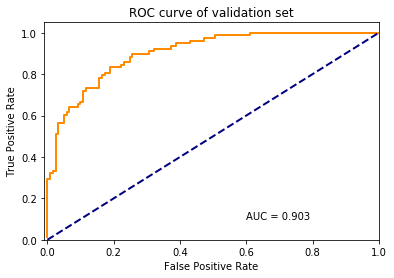

In [83]:
########plotting ROC curve
from sklearn.metrics import roc_curve, auc

y_true = label

y_score = mlp.predict(combine)

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1)

#plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of validation set')
plt.text(0.6, 0.1, 'AUC = 0.903')
plt.show()
#plt.savefig('/Users/schen/Desktop/scExpression/projects/SAE/plot/ROC_all_training2')

In [67]:
auc(fpr,tpr)

0.9032634032634032

In [160]:
#predicting for all the genes and save as Frisk score

In [52]:
pred_score = mlp.predict(allSamples)

In [56]:
pred_score.shape

(19531, 1)

In [58]:
pred_score = pd.DataFrame(pred_score)

In [60]:
pred_score.index = allSamples.index

In [73]:
pred_score = pred_score.rename(columns = {0:"Frisk"})
pred_score.head()

,Frisk
DDX11L1,0.357535
WASH7P_p1,0.403031
LINC01002_loc4,0.321798
LOC100133331_loc1,0.293103
LOC100132287_loc2,0.332593


In [75]:
pred_score.shape

(19531, 1)

In [79]:
pred_score.sort_values(by = ["Frisk"], ascending= False, inplace= True)
pred_score

,Frisk
STMN2,0.985563
MEG3,0.985088
MIAT,0.977511
MAPT_loc1,0.976380
NRXN1,0.975491
CCDC88A,0.973949
NCAM1,0.973547
KIDINS220,0.972767
DCX,0.969535
INA,0.969373


In [80]:
pred_score.to_csv(path_or_buf="/Users/schen/Desktop/scExpression/projects/SAE/data/Frisk_20epochs_mlp.csv", header=True, index = True, index_label= "GeneName")

Train on 158 samples, validate on 41 samples
Epoch 1/20
158/158 [==============================] - 2s 11ms/step - loss: 0.8098 - binary_accuracy: 0.5063 - val_loss: 0.7261 - val_binary_accuracy: 0.4146
Epoch 2/20
158/158 [==============================] - 0s 71us/step - loss: 0.7132 - binary_accuracy: 0.5000 - val_loss: 0.7224 - val_binary_accuracy: 0.4634
Epoch 3/20
158/158 [==============================] - 0s 73us/step - loss: 0.7162 - binary_accuracy: 0.5253 - val_loss: 0.7209 - val_binary_accuracy: 0.5610
Epoch 4/20
158/158 [==============================] - 0s 76us/step - loss: 0.7046 - binary_accuracy: 0.5443 - val_loss: 0.7175 - val_binary_accuracy: 0.5854
Epoch 5/20
158/158 [==============================] - 0s 69us/step - loss: 0.6855 - binary_accuracy: 0.6203 - val_loss: 0.7054 - val_binary_accuracy: 0.5610
Epoch 6/20
158/158 [==============================] - 0s 74us/step - loss: 0.6833 - binary_accuracy: 0.6139 - val_loss: 0.6908 - val_binary_accuracy: 0.5854
Epoch 7/20
15

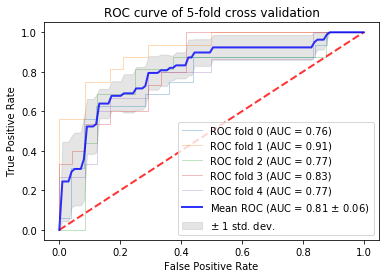

In [169]:
#5-fold cross validation
# Run classifier with cross-validation and plot ROC curves

from scipy import interp
from itertools import cycle
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(combine, label):
    mlp = Sequential()
    mlp.add(Dropout(0,input_shape=(113,)))
    mlp.add(Dense(64,kernel_initializer = my_init1,activity_regularizer=regularizers.l1(10e-7)))
    mlp.add(LeakyReLU(alpha = 0.3))
    mlp.add(Dropout(0.2))
    mlp.add(Dense(32,kernel_initializer = my_init2,activity_regularizer=regularizers.l1(10e-7)))
    mlp.add(LeakyReLU(alpha = 0.3))
    mlp.add(Dense(1,activation='sigmoid'))
    #mlp.add(LeakyReLU(alpha = 0.3))
    #adam = keras.optimizers.Adam(lr=0.0005)
    mlp.compile(loss = 'binary_crossentropy',
            optimizer = 'adam',
            metrics = ['binary_accuracy'])
    #print(combine.ix[test])
    mlp.fit(combine.iloc[train],label.iloc[train],epochs = 20,batch_size = 64, 
        validation_data=(combine.iloc[test], label.iloc[test]))
    probas_ = mlp.predict(combine.iloc[test])
    #print probas_
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(label.iloc[test], probas_[:, 0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of 5-fold cross validation')
plt.legend(loc="lower right")
#plt.show()
plt.savefig('/Users/schen/Desktop/scExpression/projects/SAE/plot/ROC_5fold_cross_validation.pdf', bbox_inches = 'tight')